In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('../data/data.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
df_notna = df.dropna(how = 'any', axis=0).reset_index(drop=True)
df_notna = df_notna.loc[df_notna['Quantity']> 0].loc[df_notna['UnitPrice']> 0]
df_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [15]:
df_notna.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
import datetime
current_date = max(df['InvoiceDate']) + datetime.timedelta(days=1)

In [18]:
df_notna['Sales']  = (df_notna['Quantity'] * df_notna['UnitPrice']).round(2)

In [19]:
df_RFM = df_notna.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x : (current_date - max(x)).days,
    'InvoiceNo': 'count',
    'Sales': 'sum'
}).round(2)

In [21]:
df_RFM = df_RFM.rename(columns = {'InvoiceDate': 'RECENCY', 'InvoiceNo':'FREQUENCY', 'Sales':'MONETARY'})



**USING QUARTILE TO SCORE AND CLUSTERING GROUP OF SEGMENTATION**

In [25]:
df_RFM['r_quartile'] = pd.qcut(df_RFM['RECENCY'], 5, labels =  ['5','4','3','2','1'])
df_RFM['f_quartile'] = pd.qcut(df_RFM['FREQUENCY'],5, labels = ['1','2','3','4','5'])
df_RFM['m_quartile'] = pd.qcut(df_RFM['MONETARY'],5, labels = ['1','2','3','4','5'])
df_RFM.head()

,RECENCY,FREQUENCY,MONETARY,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


In [29]:
df_RFM['RFM_Score'] = df_RFM.r_quartile.astype(str) + df_RFM.f_quartile.astype(str) + df_RFM.m_quartile.astype(str)
df_RFM.head()

,RECENCY,FREQUENCY,MONETARY,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


In [ ]:
from google.colab import files
df_RFM.to_csv('df_RFM.csv')
files.download('df_RFM.csv')

In [31]:
df_RFM['RFM_Score'].value_counts()

555    306
111    271
455    170
122    150
444    125
      ... 
514      2
425      2
125      1
152      1
552      1
Name: RFM_Score, Length: 118, dtype: int64

# **BONUS: USING KMEANS TO CLUSTERING GROUP OF SEGMENTATION**

In [32]:
df_RFM.describe()

,RECENCY,FREQUENCY,MONETARY
count,4338.000000,4338.000000,4338.00000
mean,92.536422,90.523744,2048.68808
std,100.014169,225.506968,8985.23022
min,1.000000,1.000000,3.75000
25%,18.000000,17.000000,306.48250
50%,51.000000,41.000000,668.57000
75%,142.000000,98.000000,1660.59750
max,374.000000,7676.000000,280206.02000


<ipython-input-35-d8c2738f7625>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RFM['RECENCY'], ax = ax[0])
<ipython-input-35-d8c2738f7625>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RFM['FREQUENCY'], ax = ax[1])
<ipython-input-35-d8c2738f7625>:5: UserWarning: 

`distplot` is a depr

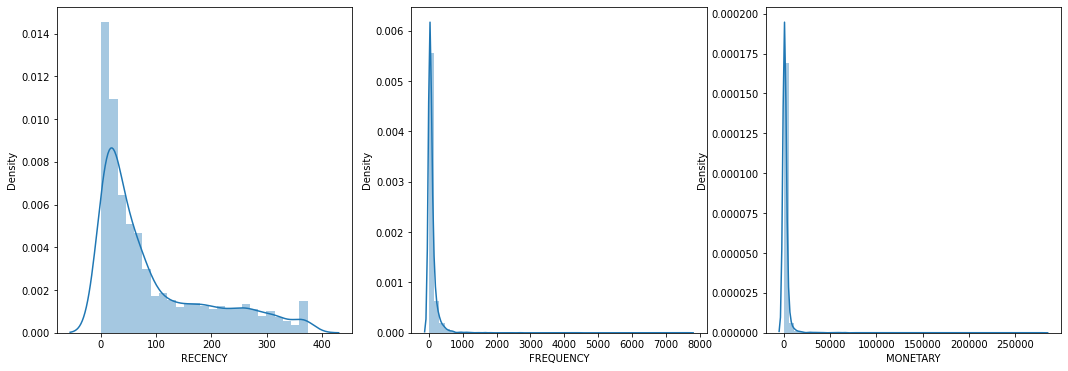

In [35]:
fig, ax = plt.subplots(1,3, figsize = (18,6))

sns.distplot(df_RFM['RECENCY'], ax = ax[0])
sns.distplot(df_RFM['FREQUENCY'], ax = ax[1])
sns.distplot(df_RFM['MONETARY'], ax = ax[2])

plt.show()

In [40]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2,2, figsize = (15, 15))
    sns.distplot(df_RFM[x], ax= ax[0,0])
    sns.distplot(np.log(df_RFM[x]), ax = ax[0,1])
    sns.distplot(np.sqrt(df_RFM[x]), ax = ax[1,0])
    sns.distplot(stats.boxcox(df_RFM[x])[0], ax = ax[1,1])
    plt.tight_layout()
    plt.show()

    print(df_RFM[x].skew().round(2))
    print(np.log(df_RFM[x]).skew().round(2))
    print(np.sqrt(df_RFM[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_RFM[x])[0]).skew().round(2))

<ipython-input-40-63b13a85f485>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_RFM[x], ax= ax[0,0])
<ipython-input-40-63b13a85f485>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_RFM[x]), ax = ax[0,1])
<ipython-input-40-63b13a85f485>:6: UserWarning: 

`distplot` is a deprecated 

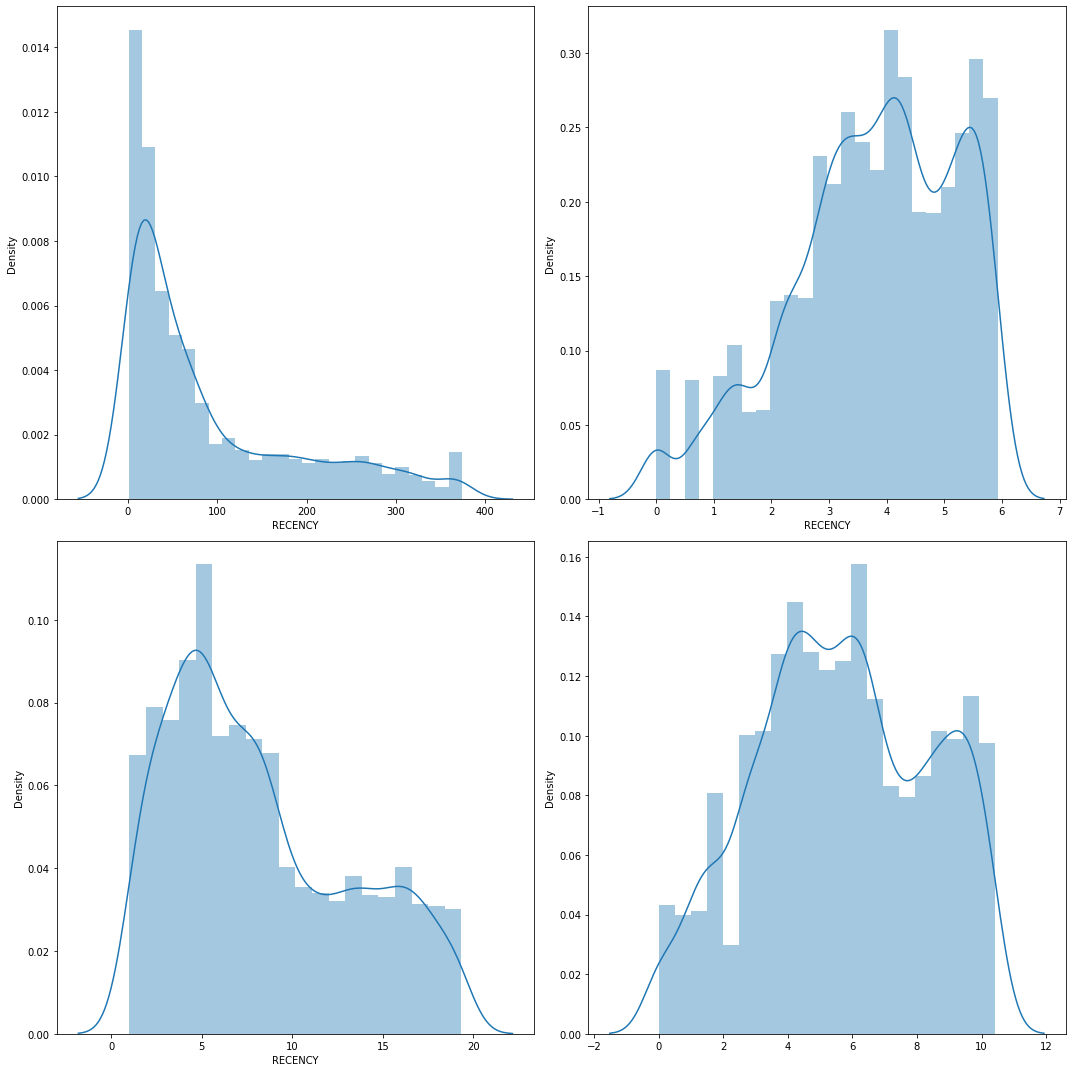

1.25
-0.55
0.59
-0.07


In [41]:
analyze_skewness('RECENCY')

In [43]:
df_RFM.head()

,RECENCY,FREQUENCY,MONETARY,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122


In [46]:
df_RFM_t = pd.DataFrame(df_RFM)
df_RFM_t['RECENCY'] = stats.boxcox(df_RFM['RECENCY'])[0]
df_RFM_t['FREQUENCY'] = stats.boxcox(df_RFM['FREQUENCY'])[0]
df_RFM_t['MONETARY'] = pd.Series(np.cbrt(df_RFM['MONETARY'])).values
df_RFM_t.head(10)

,RECENCY,FREQUENCY,MONETARY,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,10.039089,0.000000,42.576995,1,1,5,115
12347.0,0.737107,5.964958,16.273929,5,5,5,555
12348.0,6.460361,3.755086,12.158183,2,3,4,234
12349.0,3.855960,4.799349,12.068017,4,4,4,444
12350.0,9.900640,3.049494,6.941001,1,2,2,122
12352.0,4.990343,4.989760,13.583009,3,4,5,345
12353.0,8.795621,1.436787,4.464745,1,1,1,111
12354.0,9.126661,4.514377,10.257955,1,4,4,144
12355.0,8.917922,2.741381,7.716085,1,1,2,112


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_RFM_t = scaler.fit_transform(df_RFM_t)
df_RFM_t

array([[ 1.62487001, -2.57707935,  6.61453816, ..., -1.38334234,
         1.41405059, -1.46593733],
       [-1.84163571,  1.17777745,  1.29506205, ...,  1.41625601,
         1.41405059,  1.47517028],
       [ 0.29121018, -0.21330576,  0.46270238, ...,  0.01645684,
         0.70702529, -0.67050141],
       ...,
       [-1.18095643, -0.90877362, -0.85840245, ..., -1.38334234,
        -1.41405059,  1.18105952],
       [-1.5313799 ,  2.35049222,  0.57108522, ...,  1.41625601,
         0.70702529,  1.46848594],
       [-0.1303989 ,  0.41115767,  0.48082832, ...,  0.71635642,
         0.70702529,  0.06477549]])